In [311]:
import ccxt
import pandas as pd
import numpy as np

# Initialize the Binance exchange object
exchange = ccxt.binance()

# Define the symbol (Bitcoin/USDT)
symbol = 'BTC/USDT'

# Define the number of days of historical data you want
num_days = 28

# Fetch hourly OHLCV (Open, High, Low, Close, Volume) data
ohlcv = exchange.fetch_ohlcv(symbol, timeframe='1h', limit=num_days * 24)

# Create a DataFrame from the raw data
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# Convert the timestamp to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Set the timestamp as the DataFrame index
df.set_index('timestamp', inplace=True)

# Calculate daily volatility by hours
import math
log_returns = np.log(df['close']).diff()
hourly_volatility = log_returns.groupby([df.index.weekday, df.index.hour]).std() * math.sqrt(365 * 24) * 100

# Display the hourly volatility
print(hourly_volatility)

timestamp  timestamp
0          0            45.714801
           1            51.768295
           2            34.076355
           3            36.830180
           4            43.460383
                          ...    
6          19           20.570500
           20           45.955722
           21           19.939702
           22           21.495792
           23           25.792287
Name: close, Length: 168, dtype: float64


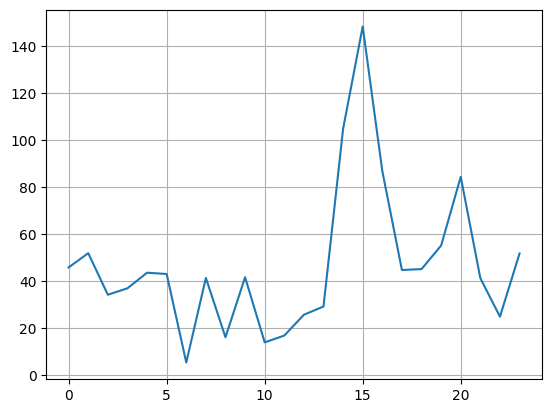

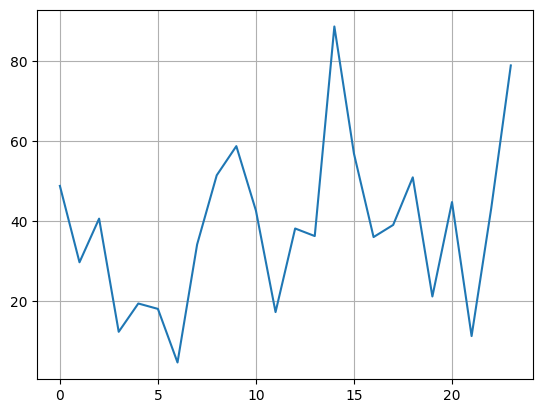

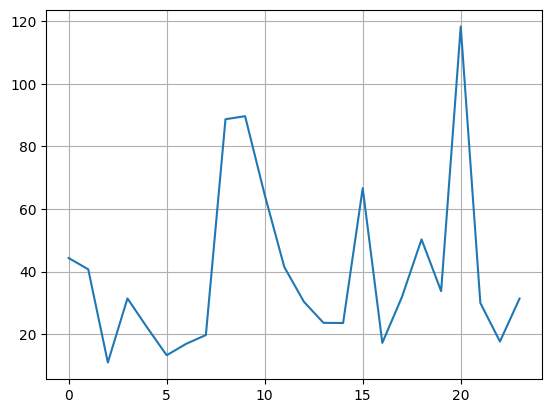

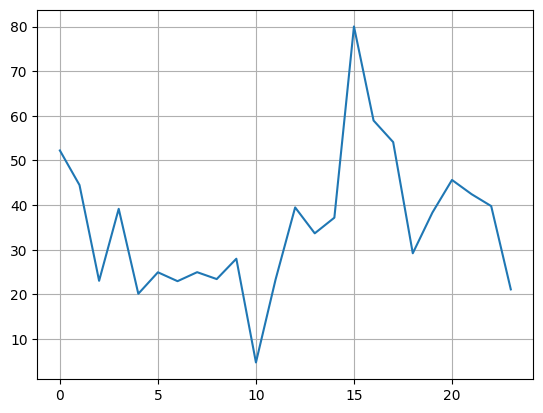

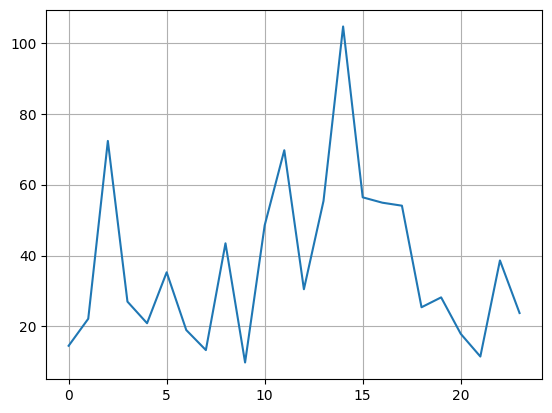

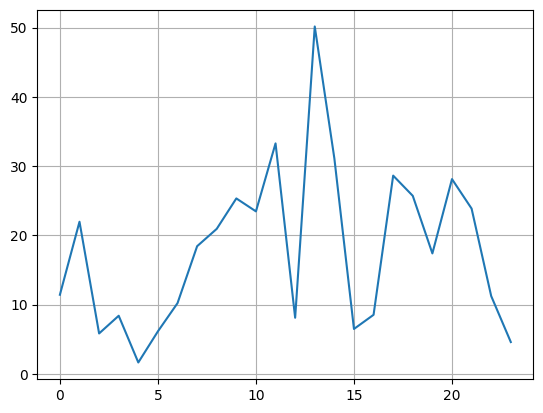

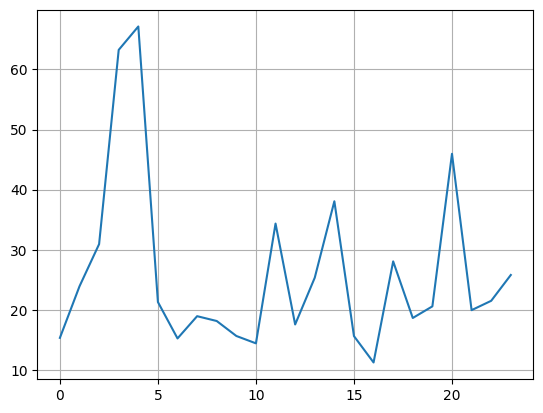

In [312]:
# Plot the hourly volatility
import matplotlib.pyplot as plt
for i in range(7):
    plt.plot(hourly_volatility.loc[i])
# plt.plot(hourly_volatility)
    plt.grid()
    plt.show()

<Axes: xlabel='timestamp'>

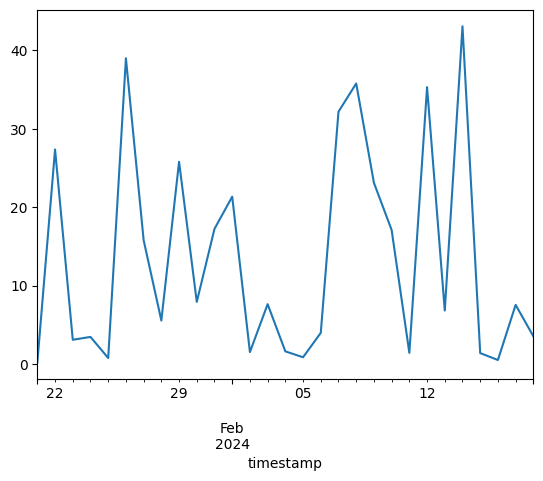

In [313]:
d = log_returns.to_frame('returns') * 100
d['weekday'] = d.index.weekday
d['hour'] = d.index.hour
d['vol'] = d['returns']**2

(abs(d.shift(-7).resample('D')['returns'].sum()) * math.sqrt(365 * 24) / 10).plot()

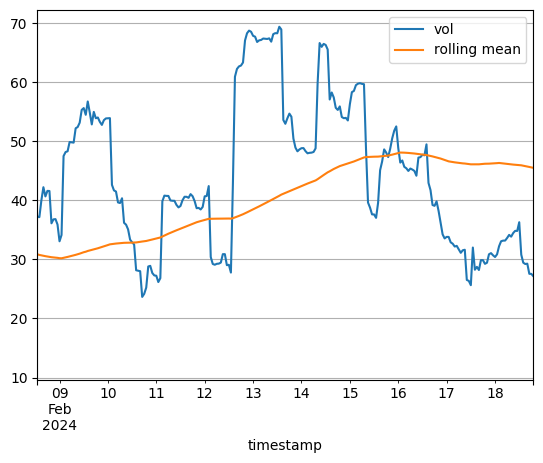

In [314]:
start = pd.to_datetime('2024-2-16 13:00')
end = pd.to_datetime('2024-2-16 19:00')
math.sqrt(d.loc[start:end, 'vol'].mean()) * math.sqrt(365 * 24)

start = pd.to_datetime('2024-2-8 13:00')
end = pd.to_datetime('2024-2-18 19:00')
vol_24h = (d['vol'].rolling(24).apply(lambda x: math.sqrt(np.mean(x))) * math.sqrt(365 * 24))
vol_24h.plot()
days = 7
vol_24h.rolling(days*24).mean().plot(label = 'rolling mean')
plt.legend()
plt.xlim(start, end)
plt.grid()
plt.show()

In [315]:
d.head(50)

,returns,weekday,hour,vol
timestamp,,,,
2024-01-21 21:00:00,NaN,6,21,NaN
2024-01-21 22:00:00,-0.365671,6,22,0.133715
2024-01-21 23:00:00,-0.127527,6,23,0.016263
2024-01-22 00:00:00,0.185253,0,0,0.034318
2024-01-22 01:00:00,-0.708404,0,1,0.501836
2024-01-22 02:00:00,-0.109795,0,2,0.012055
2024-01-22 03:00:00,-0.293135,0,3,0.085928
2024-01-22 04:00:00,-1.001747,0,4,1.003497
2024-01-22 05:00:00,0.859451,0,5,0.738656


In [316]:
def custom_rolling_mean(series: pd.Series):
    results = []
    for i in range(0,24):
        start_hour = 7-i if 7-i >=0 else 24-i+7
        if 7-i >= 0:
            keep = (series.index.hour >= start_hour) & (series.index.hour <= 7)
        else:
            keep = (series.index.hour >= start_hour) | (series.index.hour <= 7)
        series_keep = series[keep]
        series_shifted = series_keep.shift(-8, freq='H')
        result = series_shifted.resample('D').mean().apply(math.sqrt).shift(7-i, freq='H')
        results.append(result)        
    return pd.concat(results).sort_index() * math.sqrt(365*24)

# def custom_rolling_mean_group(series: pd.Series):
#     results = pd.Series(index=series.index, dtype=float)
#     results = []
#     for i in range(0,24):
#         start_hour = 7-i if 7-i >=0 else 24-i+7
#         if 7-i >= 0:
#             keep = (series.index.hour >= start_hour) & (series.index.hour <= 7)
#         else:
#             keep = (series.index.hour >= start_hour) | (series.index.hour <= 7)
#         series_keep = series[keep]
#         series_shifted = series_keep.shift(-8, freq='D')
#         result = series_shifted.resample('D').mean().apply(math.sqrt).shift(7-i, freq='H')
#         # print(i,result)
#         results.append(result)
#     return pd.concat(results).sort_index()

vals = custom_rolling_mean(d['vol'].dropna())
vals.head(50)

timestamp
2024-01-20 08:00:00    48.713438
2024-01-20 09:00:00    48.713438
2024-01-20 10:00:00    48.713438
2024-01-20 11:00:00    48.713438
2024-01-20 12:00:00    48.713438
2024-01-20 13:00:00    48.713438
2024-01-20 14:00:00    48.713438
2024-01-20 15:00:00    48.713438
2024-01-20 16:00:00    48.713438
2024-01-20 17:00:00    48.713438
2024-01-20 18:00:00    48.713438
2024-01-20 19:00:00    48.713438
2024-01-20 20:00:00    48.713438
2024-01-20 21:00:00    48.713438
2024-01-20 22:00:00    48.713438
2024-01-20 23:00:00    50.065117
2024-01-21 00:00:00    52.934132
2024-01-21 01:00:00    56.208221
2024-01-21 02:00:00    54.343761
2024-01-21 03:00:00    59.352953
2024-01-21 04:00:00    64.925219
2024-01-21 05:00:00    51.866814
2024-01-21 06:00:00    28.283109
2024-01-21 07:00:00    36.935170
2024-01-21 08:00:00    51.367120
2024-01-21 09:00:00    52.316809
2024-01-21 10:00:00    52.459892
2024-01-21 11:00:00    53.655141
2024-01-21 12:00:00    54.678148
2024-01-21 13:00:00    55.981302


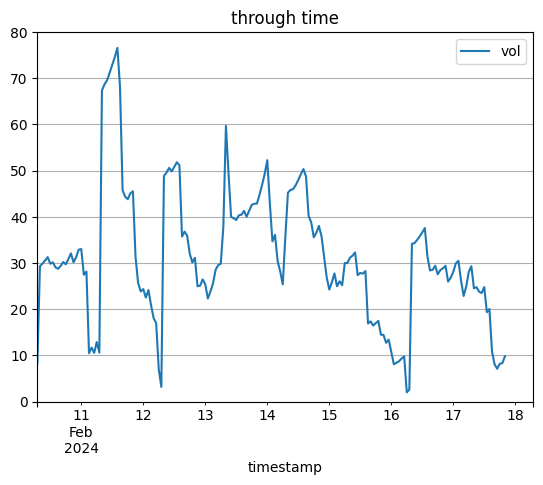

In [317]:
plt.title('through time')
vals.plot()

start = pd.to_datetime('2024-2-10 7:00')
end = pd.to_datetime('2024-2-18 7:00')
plt.legend()
plt.xlim(start, end)
plt.ylim(0, 80)
plt.grid()
plt.show()

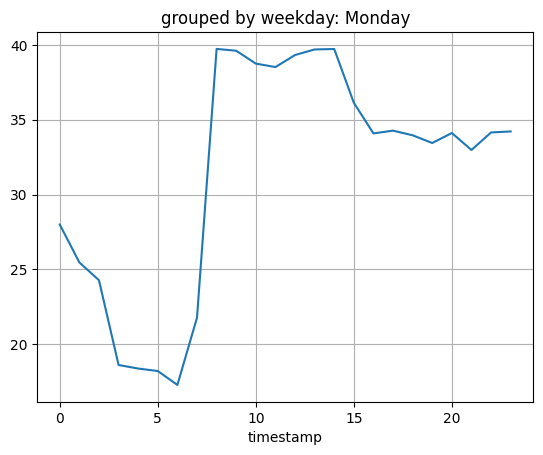

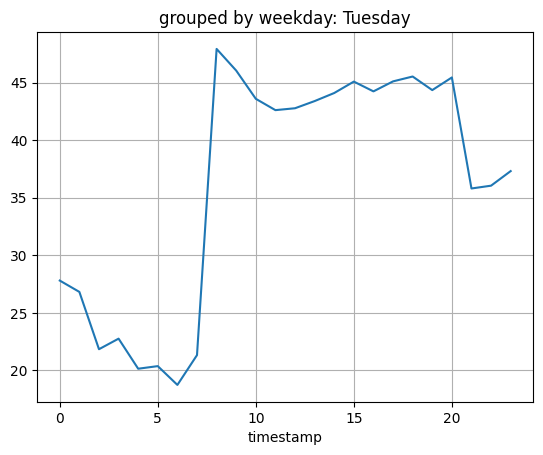

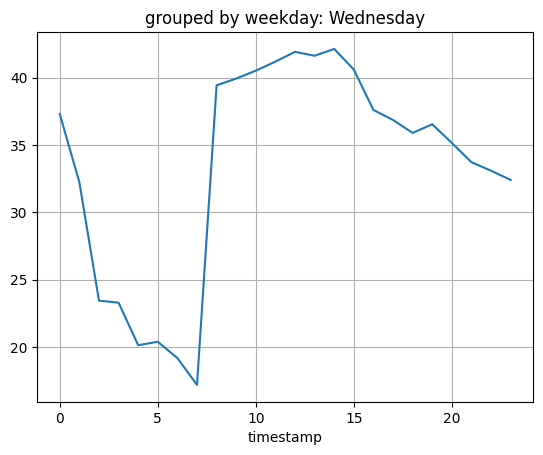

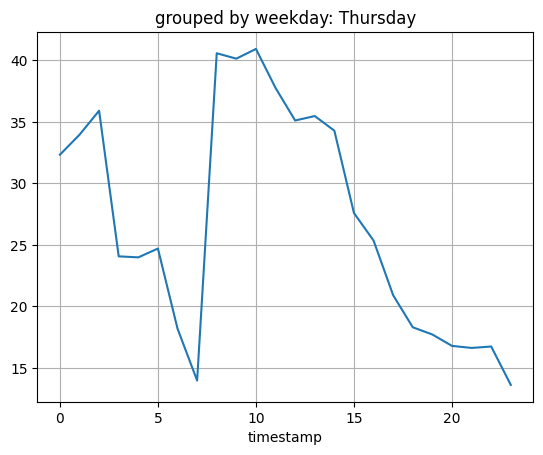

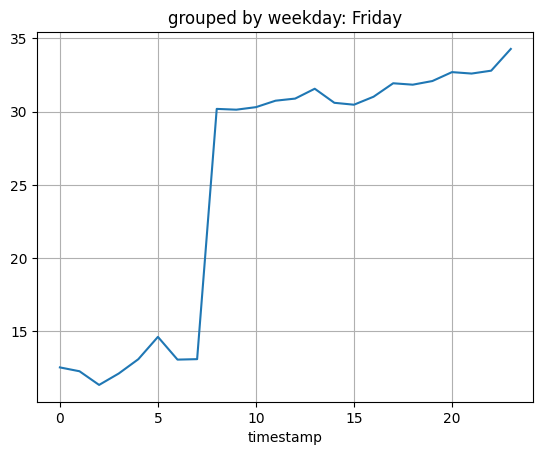

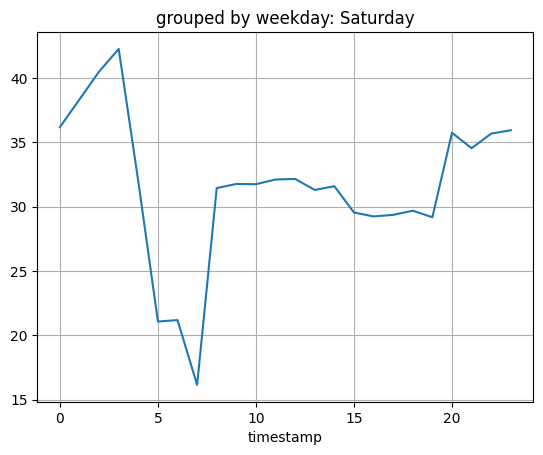

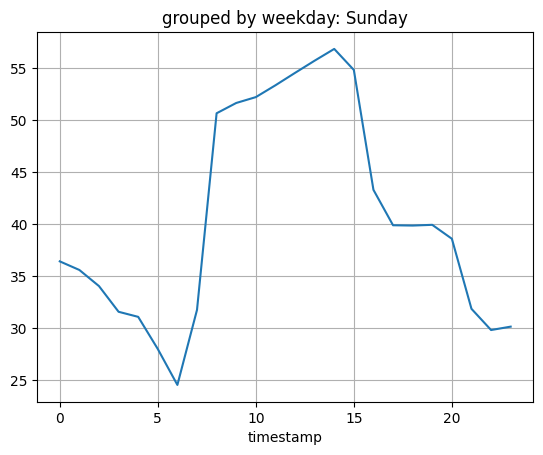

In [291]:

weekday = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

vals_grouped = vals.groupby([vals.index.weekday, vals.index.hour]).mean()
for i in range(7):
    plt.title('grouped by weekday: ' + weekday[i])
    vals_grouped.loc[i].plot()
    plt.grid()
    plt.show()

In [ ]:

print('total average')
vals_grouped = vals.groupby([vals.index.hour]).mean()
vals_grouped.plot()
plt.grid()
plt.show()

In [ ]:
(forecast.rolling(6).apply(lambda x: math.sqrt(np.mean(x))) * math.sqrt(365 * 24)).plot(label='forecast')
(forecast_out_of_sample.rolling(6).apply(lambda x: math.sqrt(np.mean(x))) * math.sqrt(365 * 24)).plot(label='forecast oos')
(d['vol'].rolling(6).apply(lambda x: math.sqrt(np.mean(x))) * math.sqrt(365 * 24)).plot(label='True')

start = pd.to_datetime('2024-2-10 13:00')
end = pd.to_datetime('2024-2-16 19:00')
plt.legend()
plt.xlim(start, end)
plt.grid()
plt.show()